<a href="https://colab.research.google.com/github/saracmbr/Code_Demo/blob/master/classification_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist


# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [71]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

In [72]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

In [73]:
train_data=train_data/(train_data.max())

test_data=test_data/255.

In [61]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

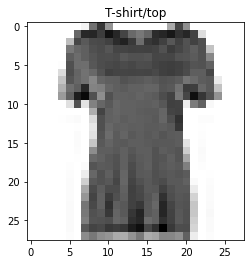

In [5]:
import matplotlib.pyplot as plt
plt.imshow(train_data[10], cmap=plt.cm.binary) # change the colours to black & white
plt.title(class_names[train_labels[10]]);

In [15]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), 
  tf.keras.layers.Dense(20, activation="relu"),
  ###tf.keras.layers.Dense(4, activation="relu"), was overfitting 
  tf.keras.layers.Dense(10, activation="softmax")
]) 

# Compile the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
history = model.fit(train_data,train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels)) 

Epoch 1/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.5851 - accuracy: 0.7956 - val_loss: 70.3235 - val_accuracy: 0.8120
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4341 - accuracy: 0.8480 - val_loss: 118.5198 - val_accuracy: 0.7828
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4029 - accuracy: 0.8576 - val_loss: 70.0727 - val_accuracy: 0.8194
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3833 - accuracy: 0.8648 - val_loss: 85.2142 - val_accuracy: 0.7988
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3714 - accuracy: 0.8691 - val_loss: 101.2641 - val_accuracy: 0.7904
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3604 - accuracy: 0.8722 - val_loss: 88.1650 - val_accuracy: 0.8019
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3531 - accuracy: 0.8753 - val_loss: 74.6927 - va

In [16]:
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model.fit(train_data,
                               train_labels,
                               epochs=40, # model already doing pretty good with current LR, probably don't need 100 epochs
                               validation_data=(test_data, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3292 - accuracy: 0.8826 - val_loss: 92.1881 - val_accuracy: 0.8057 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3266 - accuracy: 0.8824 - val_loss: 124.5494 - val_accuracy: 0.7866 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3261 - accuracy: 0.8825 - val_loss: 80.0693 - val_accuracy: 0.8172 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3255 - accuracy: 0.8829 - val_loss: 101.0263 - val_accuracy: 0.7949 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3271 - accuracy: 0.8813 - val_loss: 109.1458 - val_accuracy: 0.7928 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3268 - accuracy: 0.8818 - val_loss: 92.9178 - val_accuracy: 0.7998 - lr: 0.0018
Epoch 7/40
1875/1875 [===========================

In [78]:
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), 
  tf.keras.layers.Dense(20, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
]) 

# Compile the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.0008),
                 metrics=["accuracy"])

# Fit the model
history = model.fit(train_data,train_labels,
                                epochs=15,
                                validation_data=(test_data, test_labels)) # see how the model performs on the test set during training

Epoch 1/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5919 - accuracy: 0.8004 - val_loss: 0.4844 - val_accuracy: 0.8309
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4369 - accuracy: 0.8479 - val_loss: 0.5183 - val_accuracy: 0.8276
Epoch 3/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4056 - accuracy: 0.8578 - val_loss: 0.4361 - val_accuracy: 0.8437
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3837 - accuracy: 0.8659 - val_loss: 0.4165 - val_accuracy: 0.8530
Epoch 5/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3709 - accuracy: 0.8690 - val_loss: 0.4367 - val_accuracy: 0.8480
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3593 - accuracy: 0.8732 - val_loss: 0.4191 - val_accuracy: 0.8520
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3513 - accuracy: 0.8755 - val_loss: 0.4155 - val_accuracy:

In [74]:
test_data[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.05098039, 0.2627451 , 0.        , 0.        , 0.        ,
        0.        , 0.19607843, 0.14901961, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.03137255, 0.47058824, 0.81960784,
        0.88627451, 0.96862745, 0.92941176, 1.        , 1.        ,
        1.        , 0.96862745, 0.93333333, 0.92156863, 0.6745098 ,
        0.28235294, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.5372549 , 0.9372549 , 0.98823529, 0.95294118,
        0.91764706, 0.89803922, 0.93333333, 0.95686275, 0.96470588,
        0.94117647, 0.9019